<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/10_SVM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines
## Soft-margin classification

In [42]:
%pylab inline 
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


In [43]:
Image(url='https://github.com/yexf308/MAT592/blob/main/image/soft_margin.png?raw=true', width=800)

What if the training data is linearly non-separable?
- Introduce slack variables $\xi\in \mathbb{R}^N$ to allow misclassification for difficult examples or outliers. 

- relax constraints: $y^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\ge 1-\xi_i, \xi_i\ge 0$. (soft margin constraint)

-  If $\xi_i> 1$, $\mathbf{x}^{(i)}$ is misclassified. If $0<\xi_i< 1$, $\mathbf{x}^{(i)}$ is inside the margin, but on the correct side of the decision boundary.

In [ ]:
Image(url='https://github.com/yexf308/MAT592/blob/main/image/soft_margin_xi.png?raw=true', width=300)


### Soft-margin classification
The optimization problem becomes
$$\boxed{\min_{\mathbf{w}\in\mathbb{R}^d, w_0\in \mathbb{R},\xi\in \mathbb{R}^N}\frac{1}{2}\|\mathbf{w}\|^2+ \color{red}{\lambda \sum_{i=1}^N \xi_i}} $$
$$\text{subject to } \mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\ge 1 \color{red}{-\xi_i}, $$
$$ \color{red}{\xi_i\ge 0}, \forall i=1, \dots, N$$

$\lambda>0$ is pre-determined regularization parameter. 
$\xi_i$ is the distance $\mathbf{x}^{(i)}$ goes across the corresponding margin boundary.  
- small $\lambda$ encourages large $\xi_i$: allows misclassification with large margin. 

- large $\lambda$ encourages small $\xi_i$: discourages misclassification with narrow margin. 

- $\lambda=\infty$ enforces $\xi_i=0$: hard margin allows no misclassification. 


### Dual for soft-margin case

$$\boxed{\max_{\alpha\in \mathbb{R}^N} \sum_{i=1}^N \alpha_i-\frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N y^{(i)}y^{(j)}\alpha_i\alpha_j\langle \mathbf{x}^{(i)},\mathbf{x}^{(j)}\rangle} $$
$$\text{subject to } \sum_{i=1}^N \alpha_i \mathbf{y}^{(i)}=0, 0\le \alpha_i \color{red}{\le \lambda}, \forall i=1,\dots, N $$
Added upper bound of $\lambda$ on $\alpha_i$.

Compare with primal vs dual problem. 

**Primal**:
- $d+N+1$ unknowns.
- $N$ linear inequality constraints, $N$ non-negativity constraints.
- convex quadratic programming.

**Dual**:
- $N$ unknowns.
- one linear equality constraint, $N$ box constraints.
- The convex quadratic programming to minimize the objective function
$\frac{1}{2}\alpha^\top \mathbf{G}\alpha -\mathbb{1}^\top \alpha$, where $\mathbf{G}_{ij}=y^{(i)}y^{(j)}\langle \mathbf{x}^{(i)},\mathbf{x}^{(j)}\rangle $ and $\mathbf{G}$ is called Gram matrix. 
$$ \mathbf{v}=[y^{(1)}\mathbf{x}^{(1)}, \dots,y^{(N)}\mathbf{x}^{(N)} ].$$
$$ \mathbf{G}=\mathbf{v}^\top \mathbf{v}.$$


In [ ]:
# go back lecture 9 and set C = 1 

## Revisit Perceptron problem

Training perceptron on dataset $\{\mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^N\subset \mathbf{R}^d\times \{\pm 1\}$: 
$$\boxed{\min_{\mathbf{w\in \mathbb{R}^d, w_0\in \mathbb{R}}}\sum_{i=1}^n\left(y^{(i)}-\phi(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right)^2} $$
where the activation function $\phi(z)=1$ if $z>0$, $\phi(z)=-1$, otherwise.

In other words, we tried to find parameters such that the signs of the linear output $\mathbf{w}^\top\mathbf{x}^{(i)}+w_0$ and $y^{(i)}$ agree. Equivalently,
 $$\boxed{\min_{\mathbf{w\in \mathbb{R}^d, w_0\in \mathbb{R}}}\sum_{i=1}^n \mathbb{1}_{\{y^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)<0\}} } $$
where the indicator function 
$$ \mathbb{1}_{\{z<0\}}\begin{cases}1 & \text{if } z<0 \\ 0 & \text{Otherwise}\end{cases}$$

This is also called **0-1 loss**. 

This type of problem is intractable to minimize: discontinuous (discrete-valued), non-convex,
non-uniqueness of global min.


## SVM with hinge loss 



Let's rephase this again

$$\boxed{\min_{\mathbf{w}\in\mathbb{R}^d, w_0\in \mathbb{R},\xi\in \mathbb{R}^N}\frac{1}{2}\|\mathbf{w}\|^2+ \lambda \sum_{i=1}^N \xi_i }$$
$$\text{subject to } \xi_i\ge \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\}, \forall i=1, \dots, N$$

- If $\xi_i=0>1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)$, $\mathbf{x}^{(i)}$ is **correct** side of margin
boundary. 

- If $\xi_i=1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)>0$, $\mathbf{x}^{(i)}$ is **wrong** side of margin
boundary. 


We can simply choose $\xi_i= \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\}$ for $\forall i=1, \dots, N$.



### Alternative formulation

Drop the constraints and replace $\xi_i= \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\}$. 

$$ \boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in \mathbb{R}} \underbrace{\sum_{i=1}^N \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\} +\frac{\lambda}{2} \|\mathbf{w}\|_2^2}_{=\text{LOSS}(\mathbf{w},w_0)}}$$

- $\ell(z)=\max\{1-z, 0\}$ is called **hinge loss**. It is a convex relaxation to 0-1 loss. Hinge loss depends on how far the examples are from the decision boundary.

- Hinge loss can be minimized via subgradient method

- Soft-margin SVM minimize the hinge loss with Tikhonov regularization ($l_2$ regularization).

In [44]:
Image(url='https://github.com/yexf308/MAT592/blob/main/image/loss_comparison.png?raw=true', width=500)

The gradient of the loss function is 
$$\nabla_{\mathbf{w}} \text{LOSS}(\mathbf{w},w_0) =\begin{cases}\lambda \mathbf{w} & \text{if } \mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)>1\\ \lambda\mathbf{w} -y^{(i)} \mathbf{x}^{(i)} & \text{Otherwise}
\end{cases}  $$

$$\nabla_{w_0} \text{LOSS}(\mathbf{w},w_0) =\begin{cases} 0 & \text{if } \mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)>1\\  -y^{(i)}  & \text{Otherwise}
\end{cases}  $$


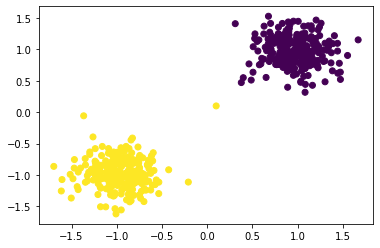

In [45]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

#some toy data generated by scikit-learn's
X_train, y = make_blobs(n_samples=500, centers=2,
                        n_features=2, random_state=1)
# We'll also scale the data to be centered at the origin with a unit standard deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y)
# we have to change the class labels to be +1 and -1 instead of 0 and 1.
y=where(y<=0, -1,1)

X_outlier = np.append(X_train_scaled, [0.1, 0.1])
X_outlier = X_outlier.reshape(X_train.shape[0]+1, X_train.shape[1])
y_outlier = np.append(y, 1)

scatter(X_outlier[:,0],X_outlier[:,1],c=y_outlier)

In [46]:
def predict(x, w, w0):
	activation = w.dot(x)+w0

	return 1 if activation >= 0.0 else -1

In [ ]:
def LOSS_f(X,y,w,w0,lambda_param):
   N,d = X.shape
   LOSS = 1/2 * lambda_param * norm(w)**2
   for i in range(N):
     condition = 1 - y[i] * (w.dot(X[i,:])+w0)
     LOSS = LOSS + max(condition, 0)
   return LOSS  


In [47]:
def train_weights(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape
  w   = ones(2)*(-1)
  w[1] = 2
  w0  = 2
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
          condition = y[i] * (w.dot(X[i,:])+w0) >= 1
          if condition:
            w = w - learning_rate * lambda_param * w

          else:
            w  = w - learning_rate * (lambda_param * w - y[i] * X[i,:] )
            w0 = w0 - learning_rate * ( -y[i] ) 
    #print(iter)
  return w, w0          





In [73]:
n_iter = 1000
n_span = arange(n_iter)
l_rate_span = 1/((1+ n_span)**2) 
w, w0 = train_weights(X_outlier, y_outlier, l_rate_span, lambda_param=0.001, n_iter=500) 
print(w)
print(w0)

[-2.05555812 -1.18227259]
0.42361111111111116


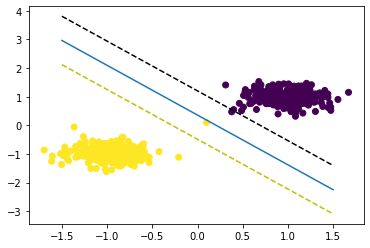

In [74]:
x_span = linspace(-1.5,1.5,100)
y_span = -(w0 + w[0] * x_span)/w[1]
y_span1 =  -(w0 + 1 + w[0] * x_span)/w[1]
y_span2 =  -(w0 - 1 + w[0] * x_span)/w[1]
scatter(X_outlier[:,0],X_outlier[:,1],c=y_outlier)
plot(x_span, y_span)
plot(x_span, y_span1,'k--')
plot(x_span, y_span2,'y--')